In [2]:
import matplotlib.pyplot as plt
import numpy as np

# TP : Le jeu de la vie



## Question 1)

In [13]:
filename = "_".join(["HMMA238", "TP", "yassinemimouni"]) + ".ipynb"
filename

'HMMA238_TP_yassinemimouni.ipynb'

## Question 2)

In [14]:
taille_str = len(filename)
taille_strlle_str

31

## Question 3)

In [15]:
ma_graine = taille_str % 6
ma_graine

1

## Question 4) 


### Partie 1

In [31]:
def calcul_nb_voisins(Z):
    
    '''Fonction qui renvoie une matrice de même taille que Z contenant le nombre de voisins de chaque élément de Z
    i.e. N[i] = nombre de voisins de Z[i]'''
    
    
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] -1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1] + Z[x][y-1] + Z[x+1][y-1] \
            + Z[x-1][y] + 0 + Z[x+1][y] \
            + Z[x-1][y+1] + Z[x][y+1] + Z[x+1][y+1]
    return N                     


In [9]:
Z =[[0,0,0,0,0,0],[0,0,0,1,0,0],[0,1,0,1,0,0],[0,0,1,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
N = calcul_nb_voisins(Z)
N

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

N représente la matrice contenant le nombre de voisins de chaque élément de Z  i.e. N[i] = nombre de voisins de Z[i].


### Partie 2

In [8]:
def iteration_jeu(Z):
    
    '''Fonction d'une matrice Z
       Renvoie la matrice Z après un tour du jeu de la vie
       Fait appel à la fonction calcul_nb_voisin'''    
    
    
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1, forme[0] -1):
        for y in range(1, forme[1] - 1):
            if Z[x][y] == 1 and (N[x][y]<2 or N[x][y]>3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y]==3:
                Z[x][y] = 1
               
    return Z
    

In [7]:
help(iteration_jeu)

Help on function iteration_jeu in module __main__:

iteration_jeu(Z)
    Fonction d'une matrice Z
    Renvoie la matrice Z après un tour du jeu de la vie
    Fait appel à la fonction calcul_nb_voisin



Voici à quoi ressemble la situation initiale de notre jeu.

(-0.5, 5.5, 5.5, -0.5)

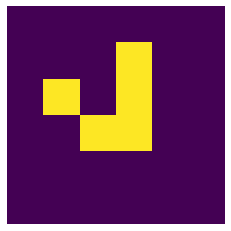

In [10]:
Z =[[0,0,0,0,0,0],[0,0,0,1,0,0],[0,1,0,1,0,0],[0,0,1,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
plt.imshow(Z)
plt.axis('off')

## Question 5)

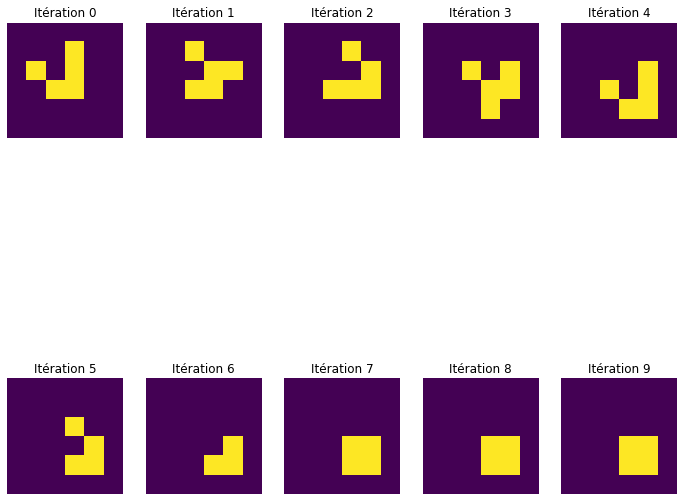

In [191]:
fig, axs = plt.subplots(2, 5, figsize=(12,12))

Y=np.array(Z)

for i in range(2):
    for j in range(5):
        
        axs[i,j].imshow(Y)
        axs[i,j].set_title("".join("Itération " + str(5*i+j))) # Numero de l'itération
        axs[i,j].axis('off')                                   # Suppression des axes
        
        Y = iteration_jeu(Y)

Ci-dessus, les dix premiers tours du jeu de la vie.

## Question 6)

De l'itération 0 à 4, le nombre de cellules vivantes reste constant (= 5) avec un mouvement de la localisation de ces cellules.  
A partir de l'itération 7, le nombre de cellules vivantes reste constant et sans mouvement.  
Le jeu s'arrête.


## Question 7)

On slice les termes de np_vect à l'exception du premier et du dernier.  
On y ajoute les 4 premiers termes de vect et les 4 derniers termes de ce même vecteur. 

In [50]:
vect = np.array([0,1,0,0,1,1])  # array vect
np_vect = np.zeros(vect.shape)  # array de même shape que vect composé de 0 uniquement
np_vect[1:-1] += (vect[:-2] + vect[2:]) 

## Question 8)

On définit la fonction calcul_nb_voisins_np.

In [42]:
import numpy as np

In [103]:
def calcul_nb_voisins_np(Z):
    
    """Fonction prenant en entrée un numpy array Z
       Calcul la matrice contenant le nombre de voisins de chaque élément de Z
       Utilise les méthodes de slicing"""
    
    nbv = np.zeros(Y.shape)
    nbv[1:-1, 1:-1] = Y[:-2, :-2] + Y[1:-1, :-2] + Y[2:, :-2] \
       + Y[:-2, 1:-1] + 0 + Y[2:, 1:-1] \
       + Y[:-2, 2:] + Y[1:-1, 2:] + Y[2:, 2:]
    
    return (nbv)

On compare le résultat obtenu avec celui de la fonction calcul_nb_voisins sur la matrice Z.

In [104]:
Z =[[0,0,0,0,0,0],[0,0,0,1,0,0],[0,1,0,1,0,0],[0,0,1,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]

nbv = np.array(calcul_nb_voisins(Z))
nbv_np= calcul_nb_voisins_np(Z)
nbv.all()==nbv_np.all()


True

## Question 9)

In [185]:
def iteration_jeu_np(Z):
    
    """Fonction similaire à iteration_jeu qui prend en entrée des numpy array"""
    
   
    forme = Z.shape
    N = calcul_nb_voisins_np(Z)
    for x in range(1, forme[0] -1):
        for y in range(1, forme[1] - 1):
            if Z[x][y] == 1 and (N[x][y]<2 or N[x][y]>3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y]==3:
                Z[x][y] = 1
               
    return (Y)
    

On test l'égalité des fonctions iteration_jeu et iteration_jeu_np

In [108]:
Z =[[0,0,0,0,0,0],[0,0,0,1,0,0],[0,1,0,1,0,0],[0,0,1,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]

Y=np.asarray(Z)
W = np.asarray(iteration_jeu(Z))
W.all() == iteration_jeu_np(Y).all()

True

## Question 10)

In [247]:
def jeu_np(Z_ini, nb_iter):
    
    """Fonction admettant en entrée un numpy array Z_in et en sortie la matrice Z après nb_iter itérations du jeu de la vie"""
    
    if (nb_iter==0):
        return(plt.imshow(Z_ini), plt.title("".join("Itération " + str(nb_iter))), plt.axis('off'))
    
    else:
        for i in range(nb_iter-1):
            iteration_jeu_np(Z_ini)
        
    plt.imshow(iteration_jeu(Z_ini))
    plt.title("".join("Itération " + str(nb_iter)))
    plt.axis('off')
        

On vérifie que la fonction jeu_np fonctionne correctement.  
On compare avec l'itération 6 vù à la question 5).

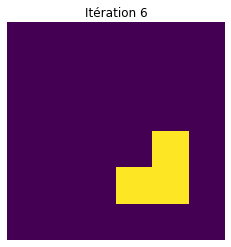

In [251]:
Z =[[0,0,0,0,0,0],[0,0,0,1,0,0],[0,1,0,1,0,0],[0,0,1,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
Y=np.asarray(Z)
jeu_np(Y,6)
